In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

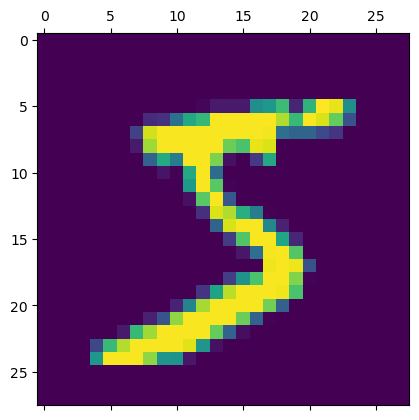

In [6]:
plt.matshow(X_train[0])

### Feature scaling

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4666 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.9254


[0.26517927646636963, 0.9254000186920166]

313/313 [==============================] - 1s 2ms/step


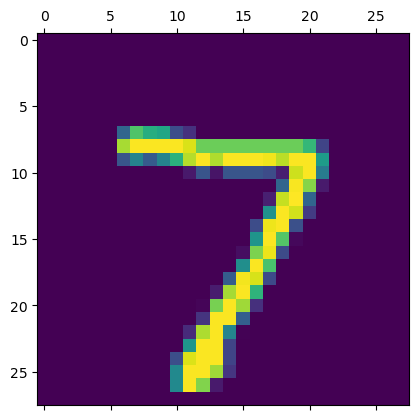

In [12]:
y_predicted = model.predict(X_test_flattened)
plt.matshow(X_test[0])

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,   10,  930,   16,    8,    2,   13,    9,   34,    5],
       [   4,    1,   20,  923,    0,   20,    3,   11,   19,    9],
       [   1,    1,    3,    2,  907,    0,   11,    3,   10,   44],
       [  10,    3,    3,   38,    9,  771,   17,    5,   29,    7],
       [   8,    3,    7,    1,    7,   11,  916,    2,    3,    0],
       [   1,    7,   25,    7,    9,    0,    0,  939,    2,   38],
       [   7,    8,    7,   27,    9,   23,   10,   11,  863,    9],
       [  10,    7,    2,   11,   18,    6,    0,   16,    4,  935]])>

Text(95.72222222222221, 0.5, 'Truth')

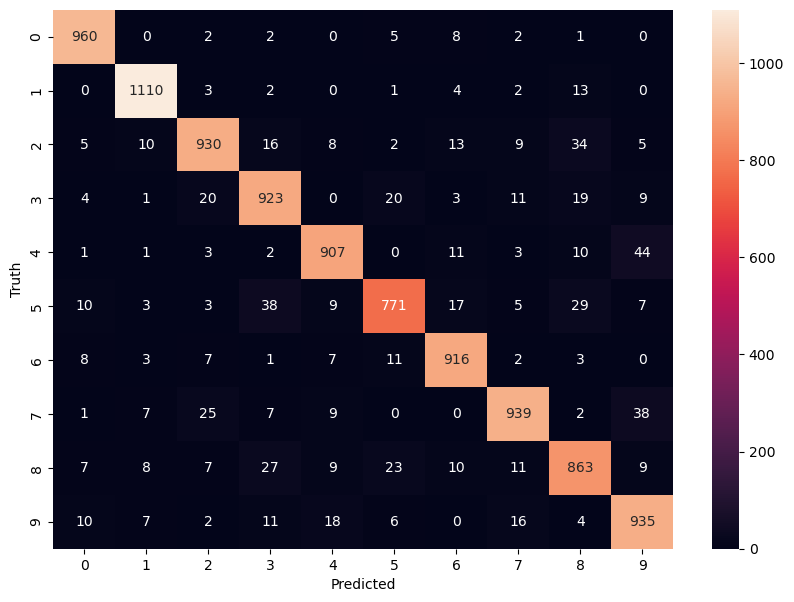

In [15]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### USING HIDDEN LAYER

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2716 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1213 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9789


[0.08254928886890411, 0.9789000153541565]

In [23]:
model.predict(X_test[[0]])

1/1 [==============================] - 0s 40ms/step


array([[8.8900101e-04, 5.2356969e-05, 3.6184143e-02, 9.7411114e-01,
        1.8118460e-09, 1.0462326e-02, 1.1785718e-10, 9.9992949e-01,
        4.9448326e-01, 8.8728017e-01]], dtype=float32)

In [24]:
y_test[[0]]

array([7], dtype=uint8)

In [25]:
np.argmax(model.predict(X_test[[0]]))

1/1 [==============================] - 0s 55ms/step


7